# Currency Rates

Notebook used to download and examine currency rates from Yahoo Finance. They are also concatenated with currency rates from Investing.com as Yahoo finance had a lot of missing data for years before 2008.

In [2]:
import yfinance as yf
import pandas as pd

In [5]:
currency_codes = {
    'United States': 'USD',  # US Dollar
    'Japan': 'JPY',  # Japanese Yuan
    'United Kingdom': 'GBP',  # Great British Pound
    'Canada': 'CAD',  # Canadian Dollar
    'France': '',
    'Switzerland': 'CHF',  # Swiss Frank
    'Germany': '',
    'Australia': 'AUD',  # Australian Dollar
    'Netherlands': '',
    'Denmark': 'DKK',  # Danish Krone
    'Sweden': 'SEK',  # Swedish Krona
    'Spain': '',
    'Hong Kong': 'HKD',  # Hong Kong Dollar
    'Italy': '',
    'Singapore': 'SGD',  # Singapore Dollar
    'Finland': '',
    'Belgium': '',
    'Norway': 'NOK',  # Norwegian Krone
    'Israel': 'ILS',  # Israeli Shekel
    'Ireland': '',
    'New Zealand': 'NZD',  # New Zealand Dollar
    'Austria': '',
    'Portugal': '',
    'Eurozona': '',

    'China': 'CNY',  # Chinese Yuan
    'Taiwan': 'TWD',  # New Taiwan Dollar
    'India': 'INR',  # Indian Rupee
    'Korea': 'KRW',  # South Korean Won
    'Brazil': 'BRL',  # Brazilian Real
    'Saudi Arabia': 'SAR',  # Saudi Riyal
    'South Africa': 'ZAR',  # South African Rand
    'Mexico': 'MXN',  # Mexican Peso
    'Thailand': 'THB',  # Thai Baht
    'Indonesia': 'IDR',  # Indonesian Rupiah
    'Malaysia': 'MYR',  # Malaysian Ringgit
    'United Arab Emirates': 'AED',  # UEA Dirham
    'Qatar': 'QAR',  # Qatari Riyal
    'Kuwait': 'KWD',  # Kuwaiti Dinar
    'Turkiye': 'TRY',  # Turkish Lira
    'Philippines': 'PHP',  # Philippine Peso
    'Poland': 'PLN',  # Polish Zloty
    'Chile': 'CLP',  # Chilean Peso
    'Greece': '',
    'Peru': 'PEN',  # Peru Sol
    'Hungary': 'HUF',  # Hungarian Forint
    'Czechia': 'CZK',  # Czech Korona
    'Egypt': 'EGP',  # Egyptian Pound
    'Colombia': 'COP',  # Colombian Peso
    'Argentina': 'ARS',  # Argentinian Peso
    'Russia': 'RUB'  # Russian Ruble
}

Need to combined data from Yahoo Finance with csv downloads from Investing.com because Yahoo has very patch data till 2006 and then a gap in October 2008

In [6]:
df = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-09-01', freq='B'),
                  columns=currency_codes)


for country in currency_codes:
    currency_code = currency_codes[country]
    start_date = '2009-01-01'

    if currency_code != '':
        currency_rates = yf.download(f'EUR{currency_code}=X', start_date, '2023-09-01')
        print(country, currency_rates.shape)
        df[country].loc[start_date:] = currency_rates['Adj Close']

        df_csv = pd.read_csv(f'currency_rates_to_2008/EUR_{currency_code} Historical Data.csv', 
                     parse_dates=True, index_col=0, thousands=',')
        df_csv = df_csv.sort_index()
        df[country].loc[:start_date] = df_csv['Price']

[*********************100%%**********************]  1 of 1 completed
United States (3821, 6)
[*********************100%%**********************]  1 of 1 completed
Japan (3823, 6)
[*********************100%%**********************]  1 of 1 completed
United Kingdom (3823, 6)
[*********************100%%**********************]  1 of 1 completed
Canada (3823, 6)
[*********************100%%**********************]  1 of 1 completed
Switzerland (3821, 6)
[*********************100%%**********************]  1 of 1 completed
Australia (3823, 6)
[*********************100%%**********************]  1 of 1 completed
Denmark (3823, 6)
[*********************100%%**********************]  1 of 1 completed
Sweden (3822, 6)
[*********************100%%**********************]  1 of 1 completed
Hong Kong (3823, 6)
[*********************100%%**********************]  1 of 1 completed
Singapore (3823, 6)
[*********************100%%**********************]  1 of 1 completed
Norway (3823, 6)
[*********************100

In [7]:
df

,United States,Japan,United Kingdom,Canada,France,Switzerland,Germany,Australia,Netherlands,Denmark,...,Poland,Chile,Greece,Peru,Hungary,Czechia,Egypt,Colombia,Argentina,Russia
1999-01-04,1.1827,132.35,0.713,1.806,NaN,1.6157,NaN,1.9026,NaN,7.4508,...,4.0686,NaN,NaN,3.7428,251.41,35.1205,4.0317,1819.5,NaN,25.382
1999-01-05,1.1764,131.08,0.7111,1.7794,NaN,1.613,NaN,1.8914,NaN,7.4392,...,4.0177,NaN,NaN,3.7355,250.605,34.905,4.0119,1792.5,NaN,26.765
1999-01-06,1.1618,131.19,0.702,1.7554,NaN,1.6178,NaN,1.8472,NaN,7.4472,...,3.9767,NaN,NaN,3.6967,249.7,34.784,3.9601,1777.5,NaN,27.011
1999-01-07,1.1709,130.13,0.7095,1.7725,NaN,1.6138,NaN,1.8432,NaN,7.449,...,4.0453,NaN,NaN,3.735,250.43,34.921,3.9911,1803.0,NaN,27.164
1999-01-08,1.1575,128.51,0.7048,1.7509,NaN,1.6141,NaN,1.8233,NaN,7.4443,...,4.0223,NaN,NaN,3.6942,249.54,35.0385,3.9456,1772.0,NaN,26.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28,1.079739,158.207993,0.8576,1.46772,NaN,0.9553,NaN,1.68262,NaN,7.4537,...,4.46588,899.280029,NaN,3.91,381.380005,24.088301,33.230499,4374.899902,377.997986,102.099998
2023-08-29,1.082556,158.544998,0.85836,1.47231,NaN,0.95641,NaN,1.68401,NaN,7.45222,...,4.4661,900.109985,NaN,3.9161,383.216003,24.1399,33.422001,4406.700195,378.859192,102.237801
2023-08-30,1.086921,158.669006,0.86008,1.47363,NaN,0.9553,NaN,1.67815,NaN,7.45243,...,4.46358,909.219971,NaN,3.9161,380.799988,24.0818,33.617001,4407.600098,380.406097,103.715302
2023-08-31,1.093255,159.667999,0.85975,1.4788,NaN,0.95968,NaN,1.68689,NaN,7.45196,...,4.46765,921.200012,NaN,3.9371,379.282013,24.063601,33.751999,4411.200195,382.369995,105.043404


In [8]:
# Fill ones for countries in Eurozone

for country in currency_codes:
    if currency_codes[country] == '':
        df[country] = 1

In [31]:
df['Greece'].loc[:'2000'] = None # Greece entered Eurozone in 2001

In [32]:
df = df.ffill(limit=2)
df = df.round(4)

In [33]:
df.loc[:, df.isna().sum() > 0].isna().sum()

United Arab Emirates     28
Chile                   788
Greece                  520
Argentina               347
dtype: int64

In [34]:
country = 'United States'
df.loc[df[country].isna(), country]

Series([], Freq: B, Name: United States, dtype: float64)

In [35]:
for country in df.columns:    
    first_valid = df[country].first_valid_index()
    if not str(first_valid).startswith('1999-01-04'):
        print(country, first_valid)

United Arab Emirates 1999-02-11 00:00:00
Chile 2002-01-10 00:00:00
Greece 2001-01-01 00:00:00
Argentina 2000-05-03 00:00:00


In [36]:
for country in df.columns:
    last_valid = df[country].last_valid_index()
    if not str(last_valid).startswith('2023-09-01'):
        print(country, last_valid)

In [38]:
df.to_csv('market_data/currency_rates.csv')

## Additional data for USD rates

In [25]:
currency_codes_extra = {
    'Denmark': 'DKK',  # Danish Krone
    'Norway': 'NOK',  # Norwegian Krone
    'South Africa': 'ZAR',  # South African Rand
}

In [27]:
df = pd.DataFrame(index=pd.date_range('1999-01-04', '2023-12-31', freq='B'),
                  columns=currency_codes_extra)

for country in currency_codes_extra:
    currency_code = currency_codes_extra[country]

    if currency_code != '':
        currency_rates = yf.download(f'{currency_code}USD=X', '1999-01-01', '2023-12-31')
        print(country, currency_rates.shape)
        currency_rate = currency_rates['Adj Close']
        currency_rate.loc[currency_rate > 5*currency_rate.mean()] = None # remove outlayers
        df[country] = currency_rate

        df_csv = pd.read_csv(f'currency_rates_to_2008/{currency_code}_USD Historical Data.csv', 
                    parse_dates=True, index_col=0, thousands=',')
        df_csv = df_csv.sort_index()
        df[country].loc[:'2008-12-31'] = df_csv['Price']

df

[*********************100%%**********************]  1 of 1 completed
Denmark (5227, 6)


C:\Users\lukas\AppData\Local\Temp\ipykernel_14124\2862169532.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currency_rate.loc[currency_rate > 5*currency_rate.mean()] = None # remove outlayers
C:\Users\lukas\AppData\Local\Temp\ipykernel_14124\2862169532.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[country].loc[:'2008-12-31'] = df_csv['Price']


[*********************100%%**********************]  1 of 1 completed
Norway (5670, 6)


C:\Users\lukas\AppData\Local\Temp\ipykernel_14124\2862169532.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currency_rate.loc[currency_rate > 5*currency_rate.mean()] = None # remove outlayers
C:\Users\lukas\AppData\Local\Temp\ipykernel_14124\2862169532.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[country].loc[:'2008-12-31'] = df_csv['Price']


[*********************100%%**********************]  1 of 1 completed
South Africa (5225, 6)


C:\Users\lukas\AppData\Local\Temp\ipykernel_14124\2862169532.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  currency_rate.loc[currency_rate > 5*currency_rate.mean()] = None # remove outlayers


,Denmark,Norway,South Africa
1999-01-04,0.158800,0.133900,0.170500
1999-01-05,0.158000,0.134700,0.173400
1999-01-06,0.156000,0.134200,0.175900
1999-01-07,0.157300,0.135900,0.173300
1999-01-08,0.155500,0.135300,0.171300
...,...,...,...
2023-12-25,0.147758,0.098290,0.054152
2023-12-26,0.147817,0.098317,0.054212
2023-12-27,0.148132,0.098653,0.053622
2023-12-28,0.149014,0.099026,0.054502


In [28]:
df = df.bfill()
df = df.ffill()
df

,Denmark,Norway,South Africa
1999-01-04,0.158800,0.133900,0.170500
1999-01-05,0.158000,0.134700,0.173400
1999-01-06,0.156000,0.134200,0.175900
1999-01-07,0.157300,0.135900,0.173300
1999-01-08,0.155500,0.135300,0.171300
...,...,...,...
2023-12-25,0.147758,0.098290,0.054152
2023-12-26,0.147817,0.098317,0.054212
2023-12-27,0.148132,0.098653,0.053622
2023-12-28,0.149014,0.099026,0.054502


c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: Period with BDay freq is deprecated and will be removed in a future version. Use a DatetimeIndex with BDay freq instead.
  ret = self.converter.convert(x, self.units, self)
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  ret = self.converter.convert(x, self.units, self)
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\matplotlib\axis.py:1769: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a Dat

<Axes: >

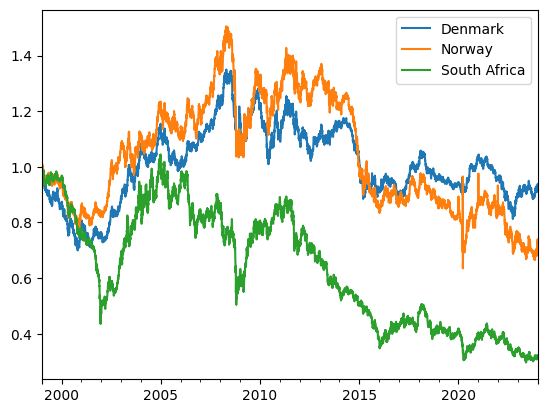

In [29]:
(df/df.iloc[0, :]).plot()

In [30]:
import pandas as pd
from SqlAlquemyInsertMarketDataHandler import SqlAlquemyInsertMarketDataHandler

from dotenv import load_dotenv
load_dotenv()

True

In [31]:
def save_to_db(historic_data, category):
    sql_handler = SqlAlquemyInsertMarketDataHandler()

    for country in historic_data.columns:     
            print(country, end='')   
            values = historic_data[country].dropna()
            symbol_code = sql_handler.get_symbol_code(category, country)
            if (len(values) > 0) and symbol_code != '':
                sql_handler.save_to_db(symbol_code, values)
            else:
                print(' - skipped')

In [32]:
save_to_db(df, 'Currency Rate USD')

Denmark.................................Inserted 6520 records for DKKUSD=X
Norway.................................Inserted 6520 records for NOKUSD=X
South Africa.................................Inserted 6520 records for ZARUSD=X
